### 1. Data Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Fraud.csv")

In [3]:
df. describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Data Cleaning


In [5]:

# check for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    data = df.drop_duplicates()

Number of duplicate rows: 0


### Outlier Detection

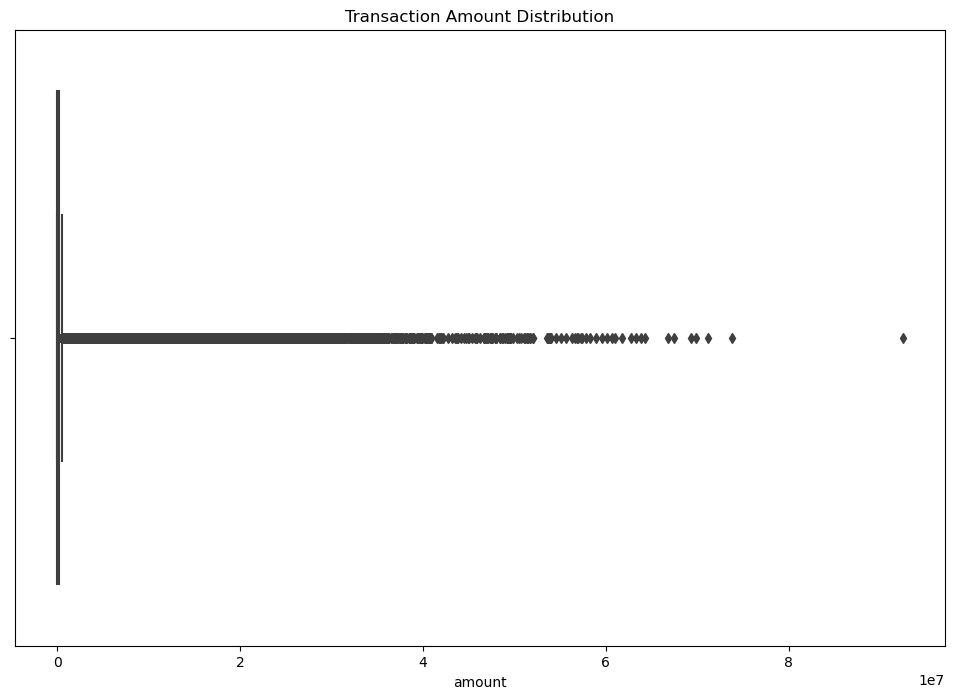

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the amount distribution
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['amount'])
plt.title('Transaction Amount Distribution')
plt.show()

# Handling outliers (ie: capping at the 99th percentile)
cap = df['amount'].quantile(0.99)
df['amount'] = df['amount'].clip(upper=cap)


### Multicollinearity Check
#### Let's check for multicollinearity among numerical features.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe with the relevant features for VIF calculation
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data


,Feature,VIF
0,amount,1.442196
1,oldbalanceOrg,466.406243
2,newbalanceOrig,468.023998
3,oldbalanceDest,29.109870
4,newbalanceDest,30.906272


2. Exploratory Data Analysis (EDA)

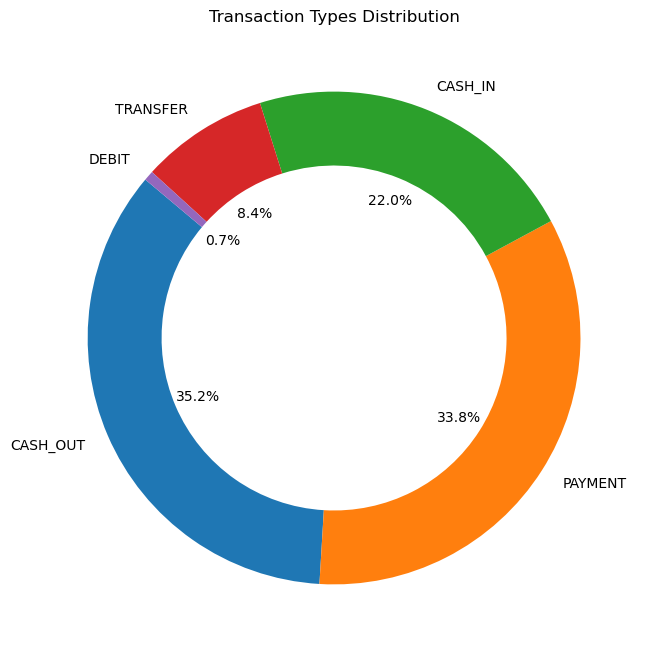

In [9]:
import matplotlib.pyplot as plt

# Distribution of transaction types
type_counts = df['type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, startangle=140, autopct='%1.1f%%', wedgeprops=dict(width=0.3))
plt.title('Transaction Types Distribution')
plt.show()


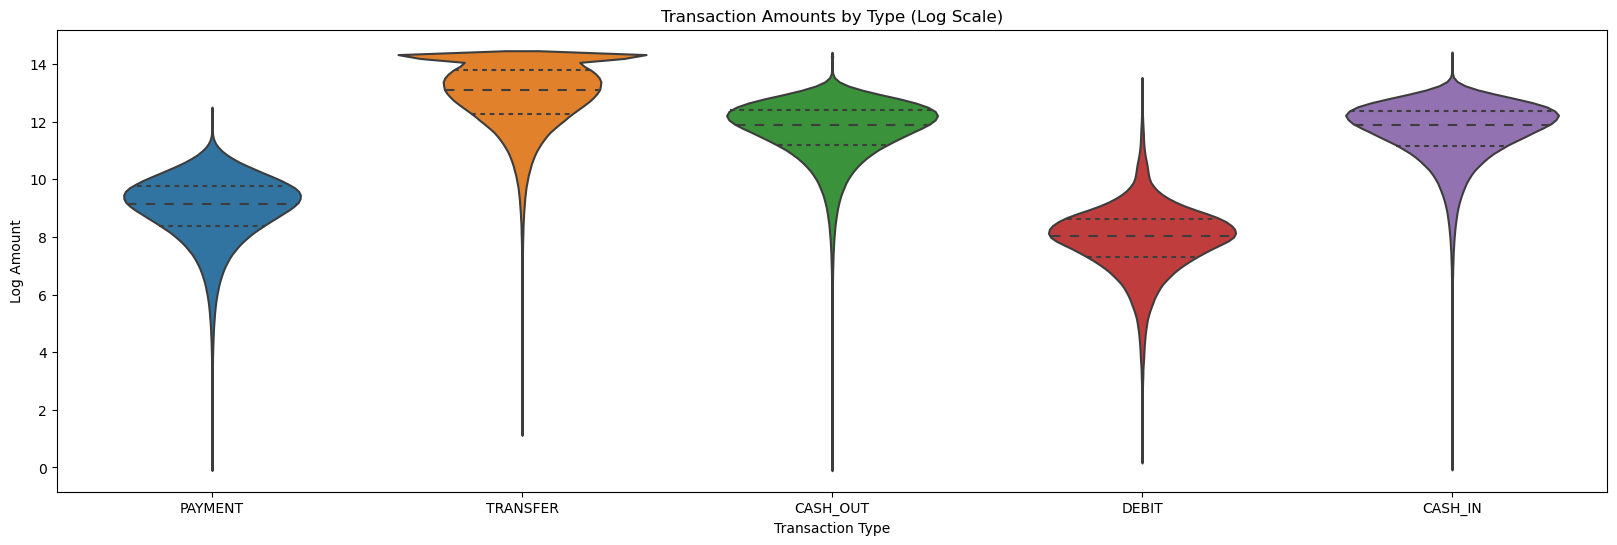

In [10]:
import seaborn as sns

# Log-transform the 'amount' to handle skewness for better visualization
df['log_amount'] = np.log1p(df['amount'])

# Distribution of transaction amounts by type
plt.figure(figsize=(20, 6))
sns.violinplot(x='type', y='log_amount', data=df, inner='quartile')
plt.title('Transaction Amounts by Type (Log Scale)')
plt.xlabel('Transaction Type')
plt.ylabel('Log Amount')
plt.show()


c:\Users\rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


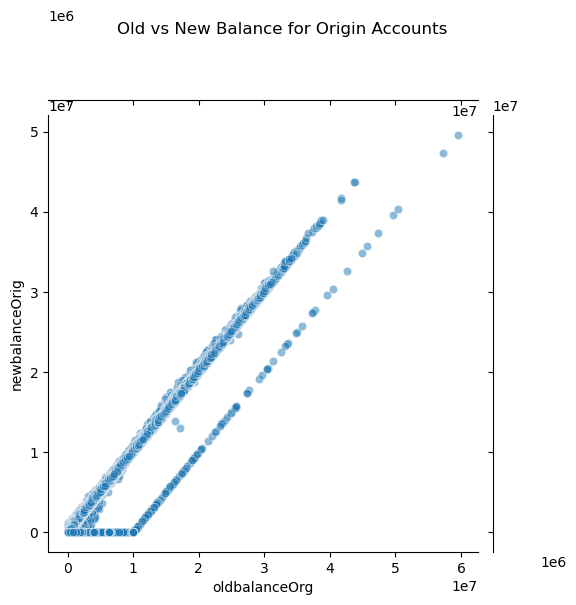

c:\Users\rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


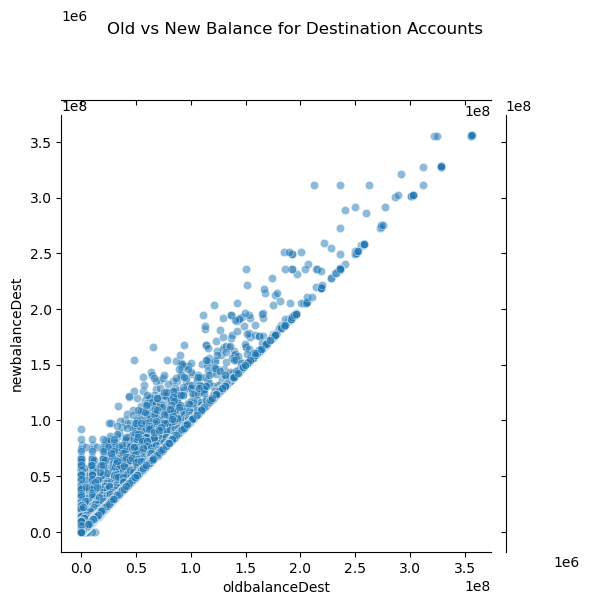

In [11]:
# Joint plot for old and new balances of origin accounts
sns.jointplot(x='oldbalanceOrg', y='newbalanceOrig', data=df, kind='scatter', alpha=0.5)
plt.suptitle('Old vs New Balance for Origin Accounts')
plt.show()

# Joint plot for old and new balances of destination accounts
sns.jointplot(x='oldbalanceDest', y='newbalanceDest', data=df, kind='scatter', alpha=0.5)
plt.suptitle('Old vs New Balance for Destination Accounts')
plt.show()


c:\Users\rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rushi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

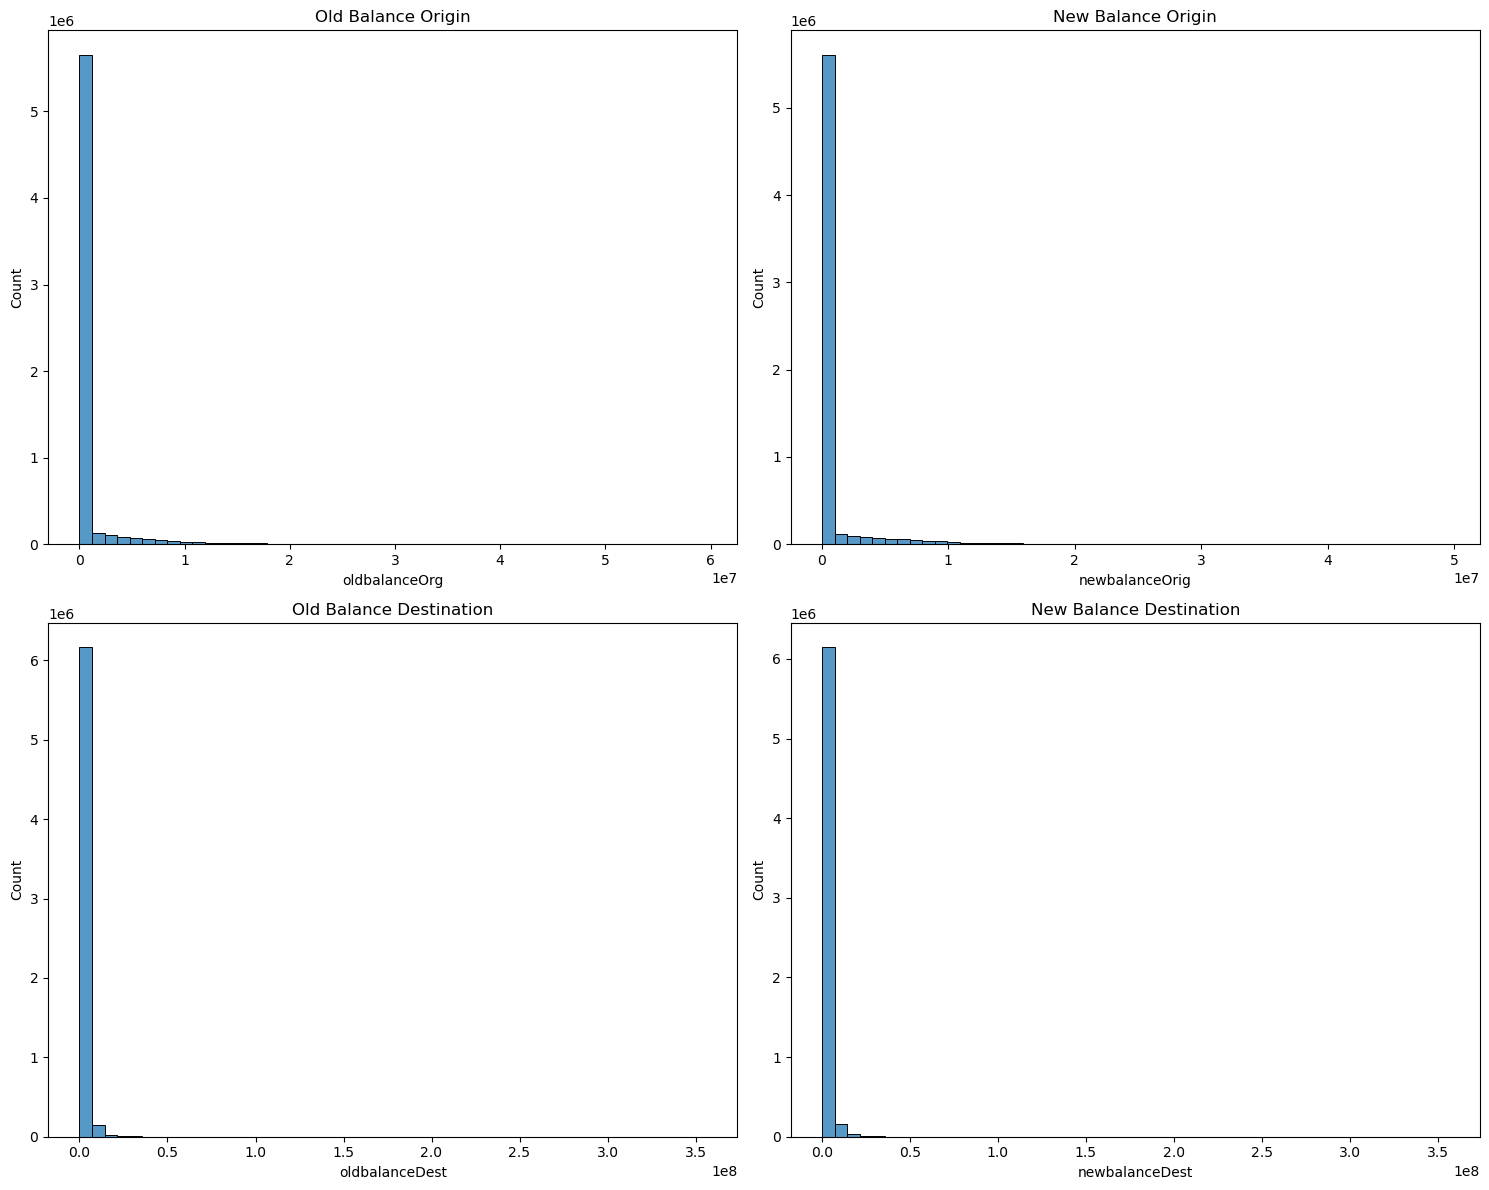

In [12]:
# Distributions of old and new balances for origin and destination accounts
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.histplot(df['oldbalanceOrg'], bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Old Balance Origin')

sns.histplot(df['newbalanceOrig'], bins=50, ax=axes[0, 1])
axes[0, 1].set_title('New Balance Origin')

sns.histplot(df['oldbalanceDest'], bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Old Balance Destination')

sns.histplot(df['newbalanceDest'], bins=50, ax=axes[1, 1])
axes[1, 1].set_title('New Balance Destination')

plt.tight_layout()
plt.show()


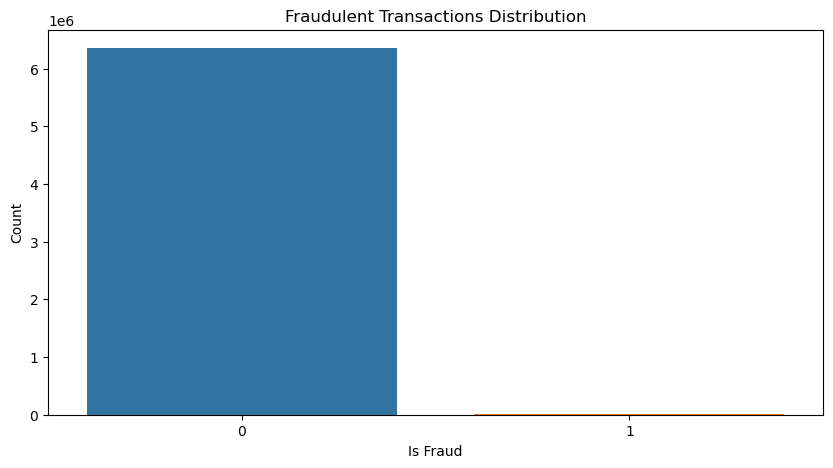

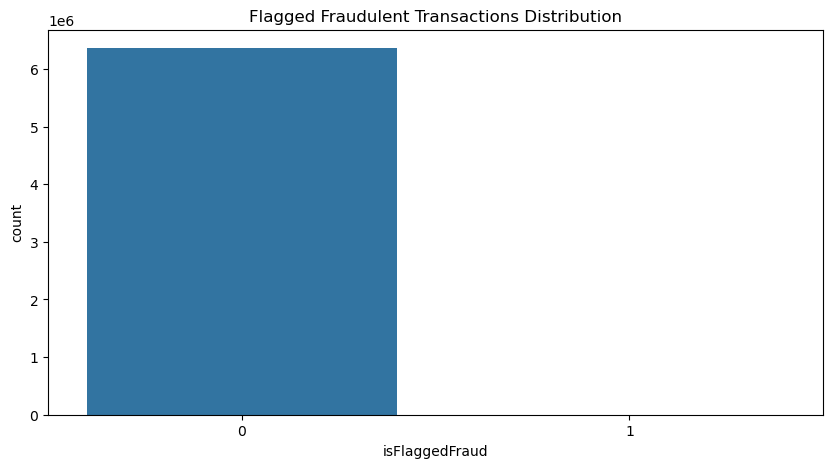

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of fraudulent transactions
plt.figure(figsize=(10, 5))
sns.countplot(x='isFraud', data=df)
plt.title('Fraudulent Transactions Distribution')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='isFlaggedFraud', data=df)
plt.title('Flagged Fraudulent Transactions Distribution')
plt.show()

### 3. Feature Engineering

In [14]:
# Create features based on 'step'
df['hour'] = df['step'] % 24
df['day'] = df['step'] // 24

# Drop the 'step' colum n if not needed
df = df.drop(columns=['step'])


In [15]:
# Create features for transaction patterns
df['trans_freq_by_orig'] = df.groupby('nameOrig')['nameOrig'].transform('count')
df['trans_freq_by_dest'] = df.groupby('nameDest')['nameDest'].transform('count')


In [16]:
# Compute balance changes
df['balance_change_orig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_change_dest'] = df['newbalanceDest'] - df['oldbalanceDest']


 Model Development

In [17]:
# Select features and target variable
features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 
            'hour', 'day', 'trans_freq_by_orig', 'trans_freq_by_dest', 'balance_change_orig', 'balance_change_dest']
target = 'isFraud'

X = df[features]
y = df[target]


In [18]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
from sklearn.model_selection import cross_val_score
clf1  = DecisionTreeClassifier()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
clf1  = DecisionTreeClassifier()
clf = clf1.fit(X_train,y_train)
# print(clf.score(x_train,y_train))
# print ("cross result========")
scores = cross_val_score(clf, X_test, y_test, cv=3)
# print (scores)
print (scores.mean())

0.9993430379580864


In [20]:
y_pred = clf1.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.84      0.85      0.84      1620

    accuracy                           1.00   1272524
   macro avg       0.92      0.92      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



In [21]:

roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 0.92


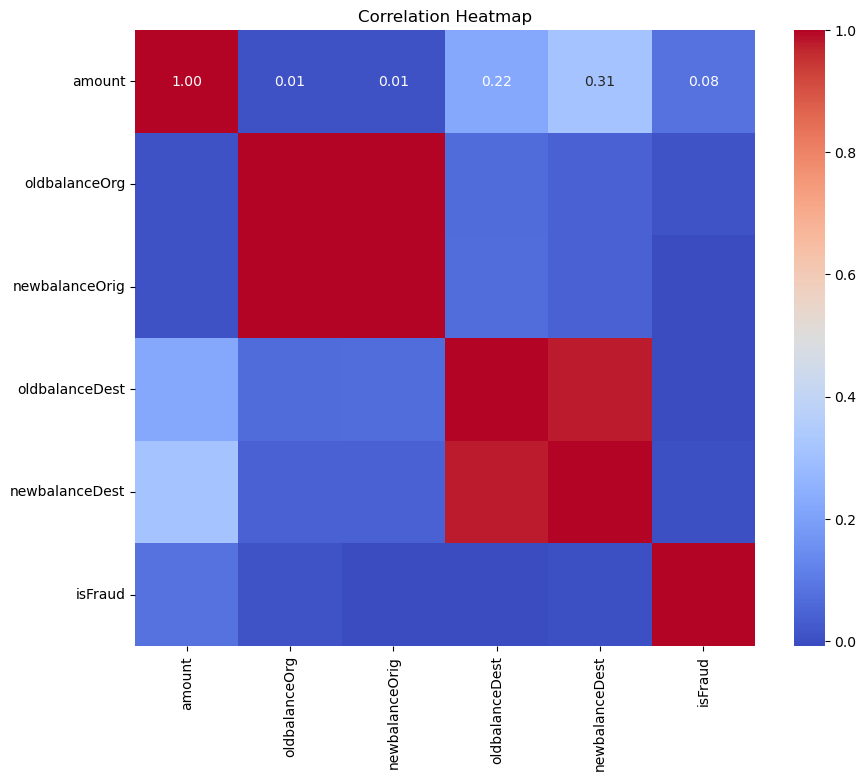

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [23]:
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                Feature  Importance
9   balance_change_orig    0.405056
4        newbalanceDest    0.138165
0                amount    0.107943
10  balance_change_dest    0.083679
6                   day    0.075376
2        newbalanceOrig    0.057268
5                  hour    0.055831
1         oldbalanceOrg    0.048984
8    trans_freq_by_dest    0.016672
3        oldbalanceDest    0.010878
7    trans_freq_by_orig    0.000150


In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
#calculate overall accuracy
y_pred = clf_svm.predict()
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')